# California Housing Price Prediction using XGBoost

In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB 187.9 kB/s eta 0:06:18
   ---------------------------------------- 0.0/70.9 MB 187.9 kB/s eta 0:06:18
   ---------------------------------------- 0.0/70.9 MB 187.9 kB/s eta 0:06:18
   ---------------------------------------- 0.0/70.9 MB 122.9 kB/s eta 0:09:37
   ---------------------------------------- 0.0/70.9 MB 122.9 kB/s eta 0:09:37
   ---------------------------------------- 0.1/70.9 MB 148.8 kB/s eta 0:07:57
   --------------------------------------

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

%matplotlib inline

We are importing the California House Price Dataset

In [11]:
california_housing = fetch_california_housing(as_frame=True)

In [15]:
california_housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

Loading the dataset into Pandas dataframe

In [19]:
cali_df = pd.DataFrame(california_housing.data, columns = california_housing.feature_names)

In [20]:
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Adding the target column to the dataframe

In [22]:
cali_df["price"] = california_housing.target

In [25]:
cali_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Now that we have imported the dataset as Dataframe, and have also imported our target variables, We can now proceed to split the data into train and test split

Before that, we will check for misisng values

In [30]:
cali_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [31]:
#Basic statistical measures of the dataframe

In [33]:
cali_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Understanding the correlation between various features of the dataset

In [36]:
correlation = cali_df.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [38]:
#plotting the correlation graph

<Axes: >

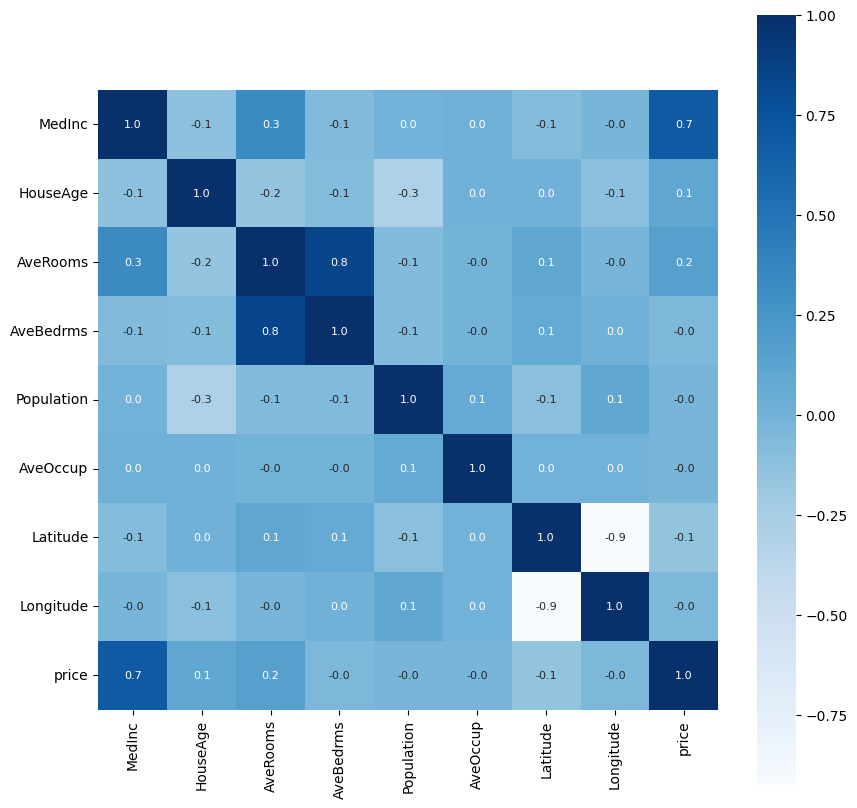

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt = ".1f", annot = True, annot_kws={'size':8}, cmap = 'Blues')

## Splitting the data into Data and labels

In [65]:
#Created features
X = cali_df.iloc[:,0:8]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [69]:
#created a target variable
y = cali_df.iloc[:,-1]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

### Splitting the data into training and testing data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=2)

In [72]:
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

(15480, 8) (5160, 8) (5160,) (15480,)


## Training the model

### XG Boost Regressor - Decision Tree Based model, Ensemble model

In [73]:
model = XGBRegressor()

In [74]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Testing the model's accuracy on both training and testing dataset

In [77]:
training_prediction = model.predict(X_train)
training_prediction

array([2.4787178 , 0.59836066, 1.1355557 , ..., 1.8771284 , 1.9281466 ,
       0.7830295 ], dtype=float32)

### Comparing the values of our model with the actual prices of the model

R Squared Error

In [79]:
score1 = metrics.r2_score(y_train, training_prediction)

In [81]:
print("R Squared Error = ", score1)

R Squared Error =  0.9454758573990555


Mean Absolute Error

In [80]:
score2 = metrics.mean_absolute_error(y_train, training_prediction)

In [90]:
print("Mean Absolute Error = ", score2)

Mean Absolute Error =  0.19007907211273786


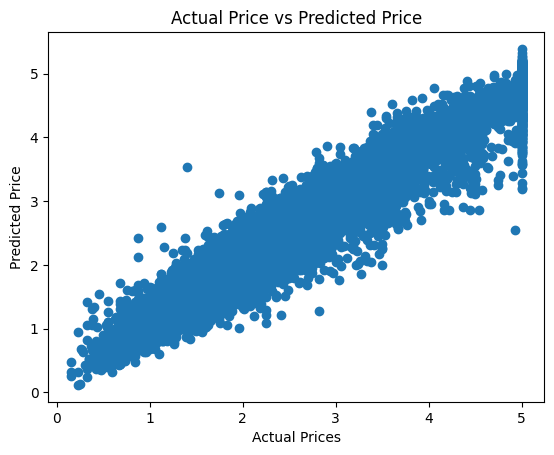

In [92]:
plt.scatter(y_train, training_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Here we can see the value of Mean absolute error is less so we can infer that our model is giving less error in the training data

Also the value of R Squared Error is high that means the accuracy of the model in training dataset is pretty good

### checking the test data prediction

In [84]:
test_prediction = model.predict(X_test)

In [86]:
test_prediction

array([2.4168377 , 1.9421093 , 1.0251547 , ..., 0.79346377, 2.7342699 ,
       2.1732411 ], dtype=float32)

In [88]:
testscore1 = metrics.r2_score(y_test, test_prediction)
print("R Squared error for test data is = ", testscore1)

R Squared error for test data is =  0.8271870476657546


In [89]:
testscore2 = metrics.mean_absolute_error(y_test, test_prediction)
print("Mean absolute error for test data is = ", testscore2)

Mean absolute error for test data is =  0.31524636962834446


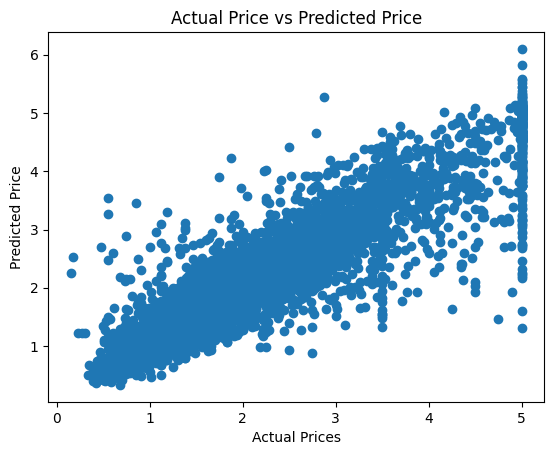

In [93]:
plt.scatter(y_test, test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Here we can see that the points are much scattered, that indicates that the model is working pretty okayish on the test dataset, it is predicting most of the values correctly

We can also plot Line plot and also Boxplots and Barplots

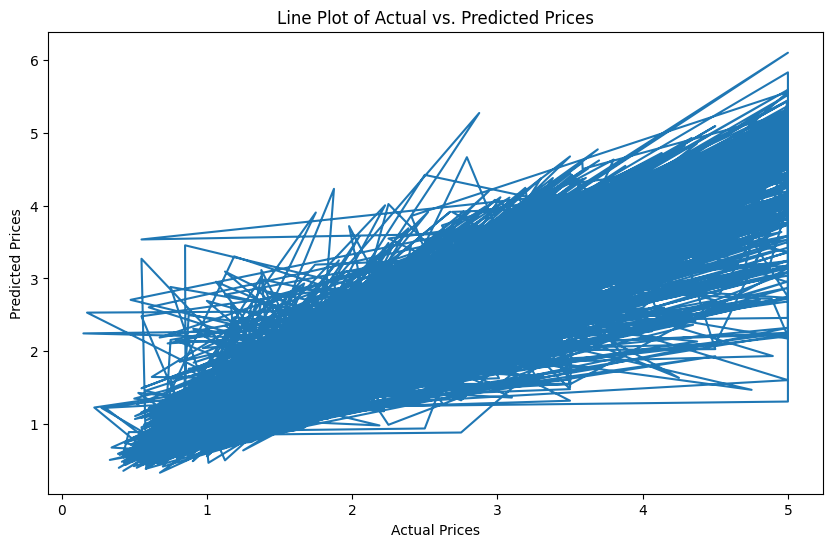

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Line Plot of Actual vs. Predicted Prices")
plt.show()

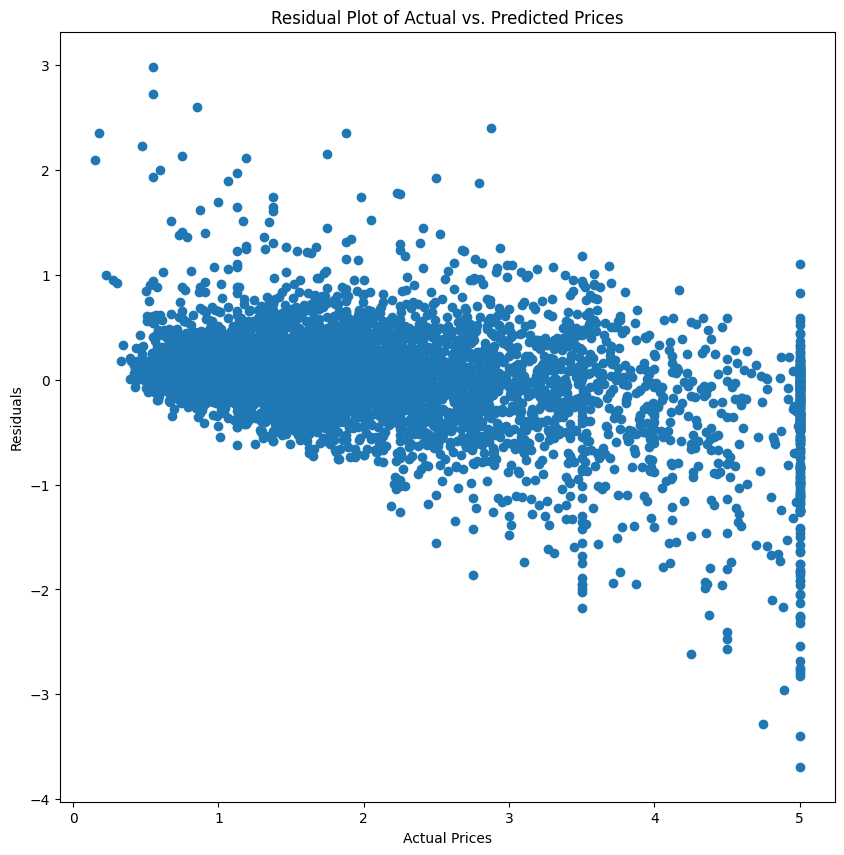

In [101]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, test_prediction - y_test)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot of Actual vs. Predicted Prices")
plt.show()

Most of the residuals are concentrated around 0, that indicates that our model is able to accurately predict the dataset